In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

random.seed()

In [37]:
class DLA:
    def __init__(self):
        self.rmax = 0
        self.state = np.zeros((1001,1001), dtype=int)
        self.history = [[0,0]]
        self.x = 0
        self.y = 0
        self.state[500,500] = 1

    def cal_rmax(self):
        for [x, y] in self.history:
            r = math.sqrt(x**2 + y**2)
            if r > self.rmax:
                self.rmax = r
        

    def randomwalk(self):
        #Initialize position
        theta = 2*math.pi*random.uniform(0,1)
        x = (self.rmax+5)*math.cos(theta)
        y = (self.rmax+5)*math.sin(theta)
        self.x = round(x)
        self.y = round(y)

        #Walk
        for n in range(1000000):
            self.i = self.x + 500
            self.j = self.y + 500
            #check adjacent
            if (np.sum(self.state[self.i-1:self.i+1,self.j])+np.sum(self.state[self.i,self.j-1:self.j+1]))>0:
                self.state[self.i,self.j] = 1
                self.history.append([self.x,self.y])
                break

            #run
            p = random.uniform(0,1)
            if p<0.25:
                self.x += 1
            elif p>0.25 and p<0.5:
                self.x -= 1
            elif p>0.5 and p<0.75:
                self.y += 1
            else:
                self.y -= 1
            
            #Max radius limitation
            if math.sqrt(self.x**2+self.y**2)>max(3*self.rmax, self.rmax+15):
                break
            if n==999999:
                print("Exceed loop limitation")


In [43]:
run = DLA()
for n in range(1000):
    run.cal_rmax()
    if run.rmax>332:
        break
    run.randomwalk()
    if n == 9999:
        print("run for 1000 times")


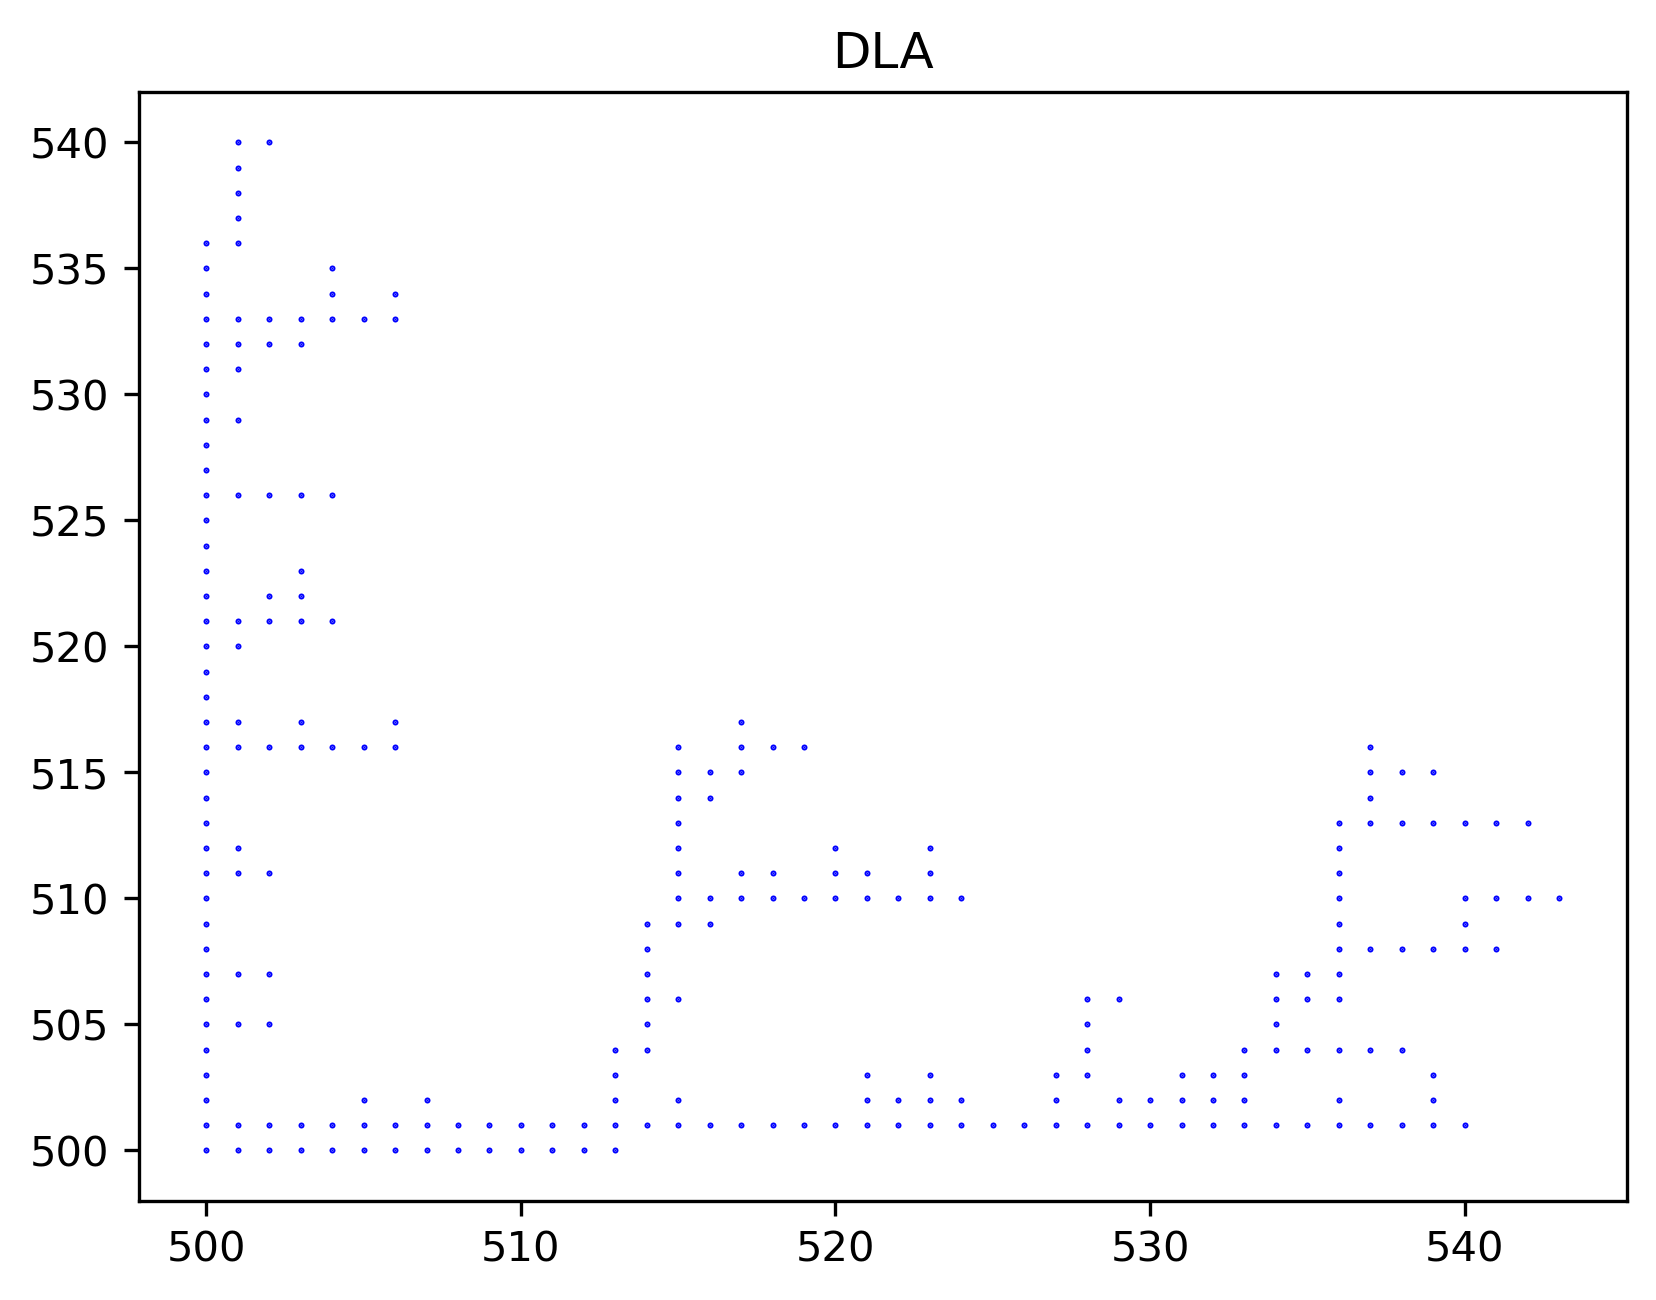

In [44]:
matrix = run.state
# 获取矩阵的行数和列数
rows, cols = matrix.shape

# 创建一个包含所有坐标的列表
x_coords = []
y_coords = []

# 遍历矩阵的每个元素，获取其坐标
for i in range(rows):
    for j in range(cols):
        if matrix[i,j] == 1:
            x_coords.append(i)
            y_coords.append(j)

# 绘制散点图
plt.figure(dpi=300) #分辨率
plt.scatter(x_coords, y_coords, color='blue', s=0.2)#透明度alpha；s点大小
plt.title('DLA')
plt.show()

In [41]:
print(len(run.history))

473


In [55]:
class DBM:
    def __init__(self):
        self.state = np.zeros((201,201), dtype=int)
        self.potential = np.zeros((201,201))
        self.state[100,100] = 1
        self.potential[100,100] = 10
        for i in range(201):
            self.state[0,i]=10
            self.state[200,i]=10
            self.state[i,0]=10
            self.state[i,200]=10
            self.potential[0,i]=0
            self.potential[200,i]=0
            self.potential[i,0]=0
            self.potential[i,200]=0
        self.boundry = []
        self.x = 0
        self.y = 0

    def getbound(self):
        self.boundry = []
        for i in range(201):
            for j in range(201):
                if self.state[i,j]==0:
                    if (np.sum(self.state[i-1:i+1,j])+np.sum(self.state[i,j-1:j+1]))>0 and (np.sum(self.state[i-1:i+1,j])+np.sum(self.state[i,j-1:j+1]))<10:
                        self.boundry.append([i,j])

    def laplace(self):
        for [i,j] in self.boundry:
            N = 0
            self.x = i
            self.y = j

            for n in range(1000000):
                #run
                p = random.uniform(0,1)
                if p<0.25:
                    self.x += 1
                elif p>0.25 and p<0.5:
                    self.x -= 1
                elif p>0.5 and p<0.75:
                    self.y += 1
                else:
                    self.y -= 1

                #check adjacent
                if self.state[self.x,self.y]==1:
                    self.potential[i,j] += self.potential[100,100]
                    N += 1
                    self.x = i
                    self.y = j
                elif self.state[self.x,self.y]==10:
                    N += 1
                    self.x = i
                    self.y = j

                if N>50:
                    break
                if n==999999:
                    print("Exceed loop limitation")
            
            self.potential[i,j] = self.potential[i,j]/N

    def generate(self):
        p = np.zeros(len(self.boundry))
        p_cum = np.zeros(len(self.boundry))
        for a, [i,j] in enumerate(self.boundry):
            p[a] = (self.potential[i,j]-10)**2
        p0 = np.sum(p[:])
        p = p/p0
        for i in range(len(p)):
            p_cum[i] = np.sum(p[:i+1])
        r = random.uniform(0,1)
        for j,pi in enumerate(p_cum):
            if r <= pi:
                choice = j
                break
        i,j = self.boundry[choice]
        self.state[i,j] = 1
        self.potential[i,j] = 10

In [56]:
runDBM = DBM()
for n in range(50):
    runDBM.getbound()
    runDBM.laplace()
    runDBM.generate()
    

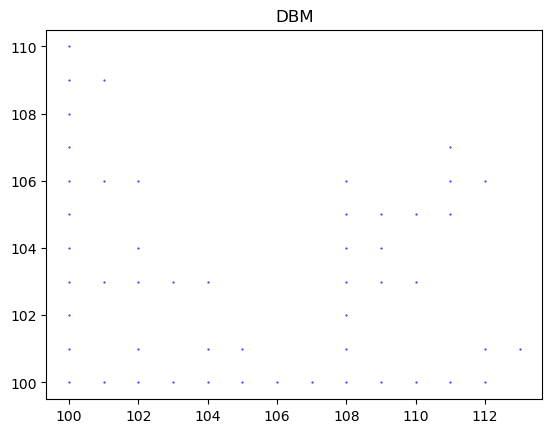

In [58]:
matrix = runDBM.state
# 获取矩阵的行数和列数
rows, cols = matrix.shape

# 创建一个包含所有坐标的列表
x_coords = []
y_coords = []

# 遍历矩阵的每个元素，获取其坐标
for i in range(rows):
    for j in range(cols):
        if matrix[i,j] == 1:
            x_coords.append(i)
            y_coords.append(j)

# 绘制散点图
#plt.figure(dpi=300) #分辨率
plt.scatter(x_coords, y_coords, color='blue', s=0.2)#透明度alpha；s点大小
plt.title('DBM')
plt.show()

In [61]:
print(runDBM.potential[100,:])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         